In [368]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
import os

# Importing dataset for District 7's 2013-2022 and combining the dataset to visualize the trends. Combined_df used for the merged datasets

In [397]:
base_path = "D7_data"
years = list(range(2013, 2023))  # 2013 to 2022

# Initialize an empty list to hold the results
all_results = []

# Loop through each year and process the corresponding CSV file
for year in years:
    # Construct the file path
    file_name = f"D7_{year}.csv"
    file_path = os.path.join(base_path, file_name)
    
    print(f"Reading data from {file_path}...")
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading file: {str(e)}")
        continue

    # Add the 'year' column
    df['year'] = year

    # Identify the relevant columns
    total_columns = [col for col in df.columns if '!!Total!!Estimate' in col]
    poverty_columns = [col for col in df.columns if '!!Below poverty level!!Estimate' in col]

    # Convert numeric columns to float, replacing any non-numeric values with NaN
    for col in total_columns + poverty_columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    # Initialize a list to store the results for this year
    results = []

    # Get unique labels from the 'Label (Grouping)' column
    labels = df['Label (Grouping)'].unique()

    # Process each label and calculate the required statistics
    for label in labels:
        # Get row data for the current label
        row_data = df[df['Label (Grouping)'] == label]

        # Initialize sums for this label
        total_estimate = 0
        below_poverty_estimate = 0

        # Sum the relevant data for each column
        for col in df.columns:
            if '!!Total!!Estimate' in col:
                value = row_data[col].iloc[0]
                if pd.notna(value):
                    total_estimate += value
            elif '!!Below poverty level!!Estimate' in col:
                value = row_data[col].iloc[0]
                if pd.notna(value):
                    below_poverty_estimate += value

        # Calculate the percentage of population below poverty level
        percent_below_poverty = round((below_poverty_estimate / total_estimate * 100), 1) if total_estimate != 0 else 0

        # Append the results for this label
        results.append({
            'year': year,
            'label': label,
            'total_estimate': total_estimate,
            'below_poverty_estimate': below_poverty_estimate,
            'percent_below_poverty_estimate': percent_below_poverty
        })

    # Create a DataFrame from the results for this year
    result_df = pd.DataFrame(results)

    # Handle any potential NaN values by filling them with 0
    result_df = result_df.fillna(0)

    # Append the result_df for this year to the all_results list
    all_results.append(result_df)

# Combine all results into a single DataFrame
combined_df = pd.concat(all_results, ignore_index=True)

# Remove \xa0 characters and strip whitespaces
combined_df['label'] = combined_df['label'].str.replace('\xa0', ' ').str.strip()

# Check the unique values again
print(combined_df['label'].unique())

combined_df.head(10)


Reading data from D7_data/D7_2013.csv...
Reading data from D7_data/D7_2014.csv...
Reading data from D7_data/D7_2015.csv...
Reading data from D7_data/D7_2016.csv...
Reading data from D7_data/D7_2017.csv...
Reading data from D7_data/D7_2018.csv...
Reading data from D7_data/D7_2019.csv...
Reading data from D7_data/D7_2020.csv...
Reading data from D7_data/D7_2021.csv...
Reading data from D7_data/D7_2022.csv...
['Population for whom poverty status is determined' 'AGE' 'Under 18 years'
 'Related children under 18 years' '18 to 64 years' '65 years and over'
 'SEX' 'Male' 'Female' 'RACE AND HISPANIC OR LATINO ORIGIN' 'One race'
 'White' 'Black or African American' 'American Indian and Alaska Native'
 'Asian' 'Native Hawaiian and Other Pacific Islander' 'Some other race'
 'Two or more races' 'Hispanic or Latino origin (of any race)'
 'White alone, not Hispanic or Latino' 'EDUCATIONAL ATTAINMENT'
 'Population 25 years and over' 'Less than high school graduate'
 'High school graduate (includes eq

,year,label,total_estimate,below_poverty_estimate,percent_below_poverty_estimate
0,2013,Population for whom poverty status is determined,102542.0,33092.0,32.3
1,2013,AGE,0.0,0.0,0.0
2,2013,Under 18 years,20620.0,8942.0,43.4
3,2013,Related children under 18 years,20497.0,8822.0,43.0
4,2013,18 to 64 years,72249.0,21461.0,29.7
5,2013,65 years and over,9673.0,2689.0,27.8
6,2013,SEX,0.0,0.0,0.0
7,2013,Male,49618.0,14813.0,29.9
8,2013,Female,52924.0,18279.0,34.5
9,2013,RACE AND HISPANIC OR LATINO ORIGIN,0.0,0.0,0.0


# Visualizing total population vs below poverty level population over the years

Population Trend DataFrame:
     year  total_population  below_poverty_population  \
0    2013          102542.0                   33092.0   
50   2014          105316.0                   34768.0   
100  2015          106906.0                   33984.0   
164  2016          107501.0                   33626.0   
228  2017          109187.0                   33187.0   
294  2018          111991.0                   34628.0   
360  2019          111156.0                   31852.0   
426  2020          131915.0                   36232.0   
492  2021          129766.0                   34224.0   
559  2022          129343.0                   34773.0   

     percent_below_poverty_population  
0                                32.3  
50                               33.0  
100                              31.8  
164                              31.3  
228                              30.4  
294                              30.9  
360                              28.7  
426                     

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/3134763439.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population['total_estimate'] = total_population['total_estimate']


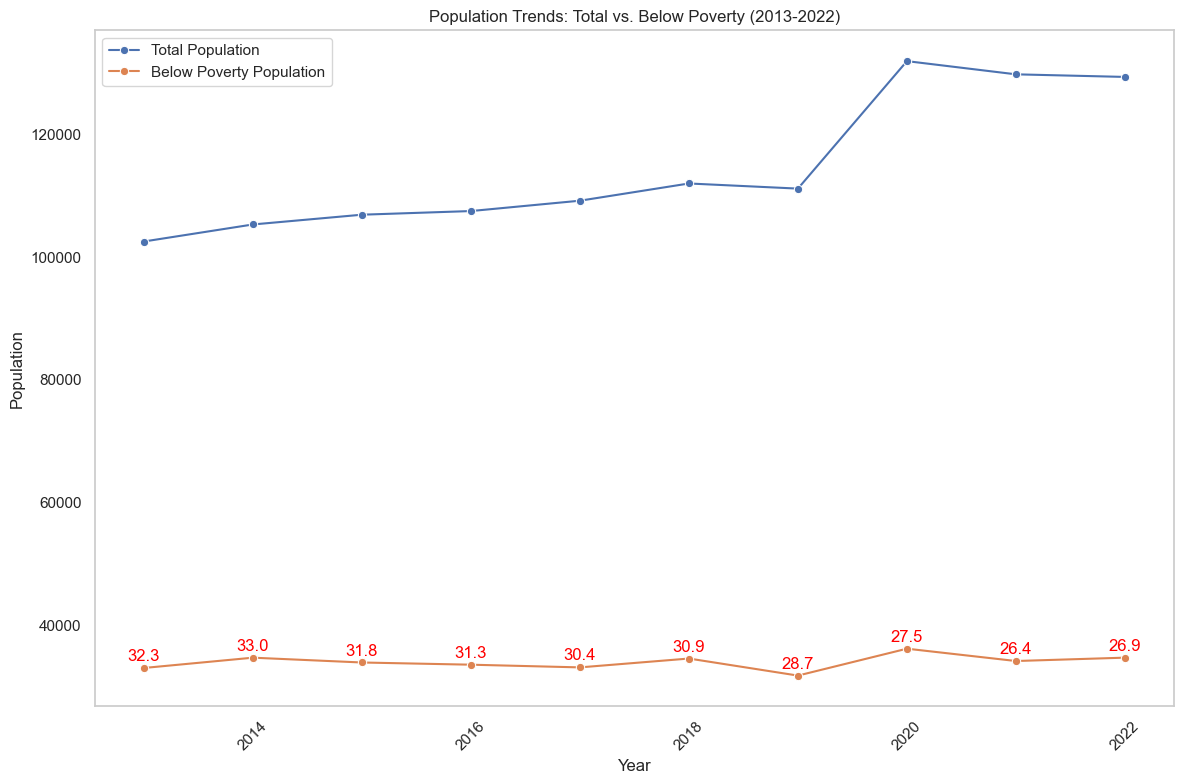

In [400]:
# total population vs bpl population over the years
total_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
]

# Extract below poverty estimates for all years directly
below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'below_poverty_estimate']].copy()

percent_below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'percent_below_poverty_estimate']].copy()

# Clean the below poverty estimate values
below_poverty_population['below_poverty_estimate'] = below_poverty_population['below_poverty_estimate']
percent_below_poverty_population['percent_below_poverty_estimate'] = percent_below_poverty_population['percent_below_poverty_estimate']

total_population['total_estimate'] = total_population['total_estimate']

# Create DataFrame for plotting
population_trend = pd.DataFrame({
    'year': total_population['year'],
    'total_population': total_population['total_estimate'],
    'below_poverty_population': below_poverty_population['below_poverty_estimate'],
    'percent_below_poverty_population': percent_below_poverty_population['percent_below_poverty_estimate']
})

# Check the Population Trend DataFrame
print("Population Trend DataFrame:")
print(population_trend)

# plot
plt.figure(figsize=(12, 8))

# Plot total population
sns.lineplot(data=population_trend, x='year', y='total_population', label='Total Population', marker='o')

# Plot below poverty population
sns.lineplot(data=population_trend, x='year', y='below_poverty_population', label='Below Poverty Population', marker='o')

for i in range(len(population_trend)):
    plt.annotate(population_trend['percent_below_poverty_population'].iloc[i], 
                 (population_trend['year'].iloc[i], population_trend['below_poverty_population'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5),  
                 ha='center', 
                 color='red')

# Add labels and title
plt.title("Population Trends: Total vs. Below Poverty (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [402]:
total_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'total_population'].values[0]
below_poverty_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'below_poverty_population'].values[0]

total_population_2022 = population_trend.loc[population_trend['year'] == 2022, 'total_population'].values[0]
below_poverty_population_2022 = population_trend.loc[population_trend['year'] == 2022, 'below_poverty_population'].values[0]

# Calculate percentages
percentage_below_poverty_2013 = (below_poverty_population_2013 / total_population_2013) * 100
percentage_below_poverty_2022 = (below_poverty_population_2022 / total_population_2022) * 100

#  Calculate the difference
percentage_change = percentage_below_poverty_2022 - percentage_below_poverty_2013

#  Print the results
print(f"Percentage Below Poverty Line in 2013: {percentage_below_poverty_2013:.2f}%")
print(f"Percentage Below Poverty Line in 2022: {percentage_below_poverty_2022:.2f}%")
print(f"Change in Percentage from 2013 to 2022: {percentage_change:.2f}%")

Percentage Below Poverty Line in 2013: 32.27%
Percentage Below Poverty Line in 2022: 26.88%
Change in Percentage from 2013 to 2022: -5.39%


# Poverty rate trends based on age groups

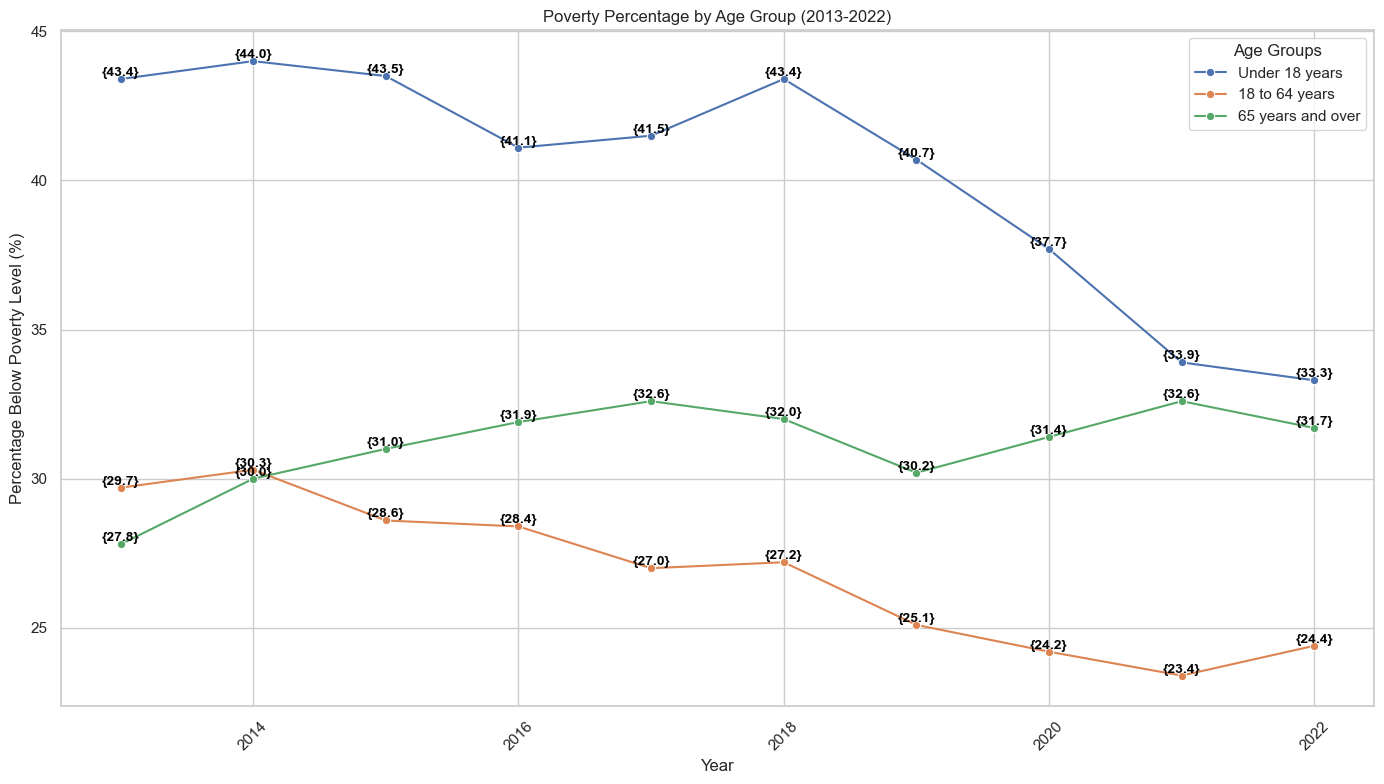

In [405]:
# Define the specific age categories to filter (adjusted based on your data)
desired_age_groups = ['Under 18 years', '18 to 64 years', '65 years and over']

# Filter the data for only these desired age groups
filtered_df = combined_df[combined_df['label'].isin(desired_age_groups)]

# Initialize plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot each desired age group separately
for age_group in desired_age_groups:
    age_group_data = filtered_df[filtered_df['label'] == age_group]
    sns.lineplot(
        data=age_group_data,
        x='year',
        y='percent_below_poverty_estimate',
        label=age_group,
        marker='o'
    )
    
    # Annotate each data point with the percentage value
    for index, row in age_group_data.iterrows():
        plt.text(row['year'], row['percent_below_poverty_estimate'], 
                 {row['percent_below_poverty_estimate']},  # Format as percentage with one decimal point
                 horizontalalignment='center', 
                 verticalalignment='bottom', 
                 size='small', color='black', weight='semibold')

# Add plot labels and title
plt.title("Poverty Percentage by Age Group (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Level (%)")
plt.xticks(rotation=45)
plt.legend(title="Age Groups")
plt.grid(True)
plt.tight_layout()
plt.show()


# Poverty trends based on gender

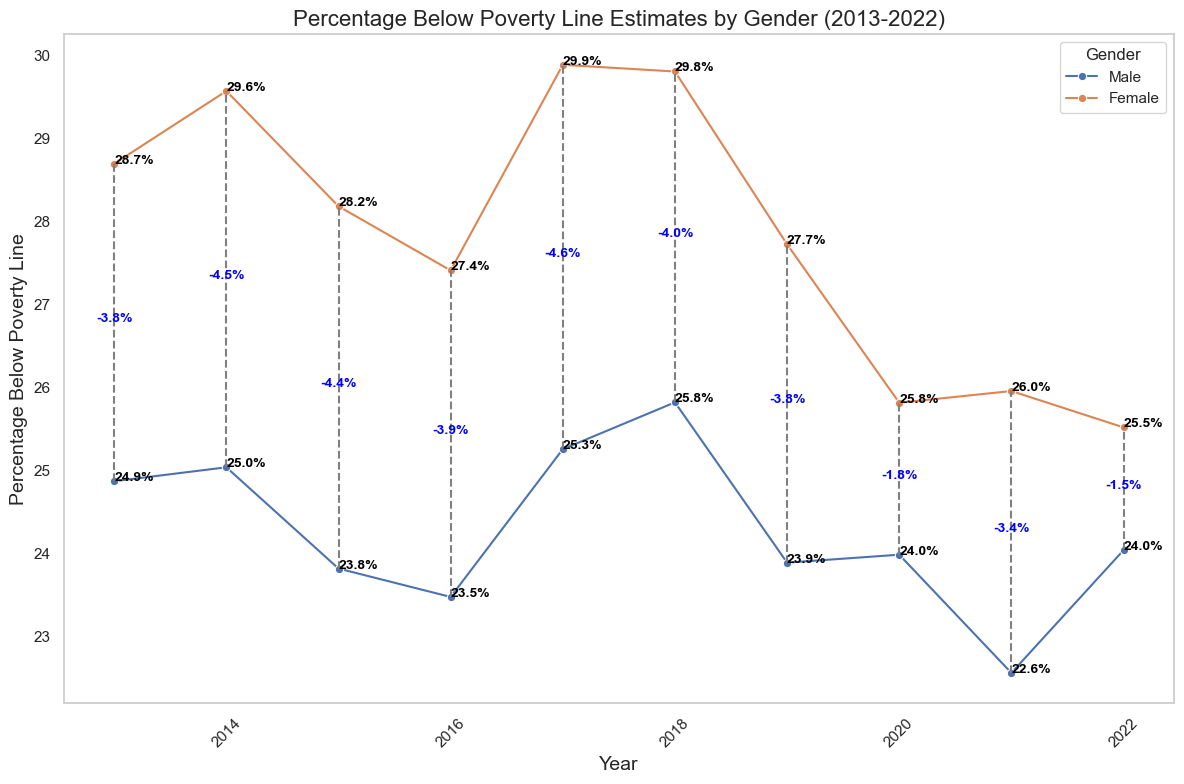

In [416]:
male_data = combined_df[combined_df['label'] == 'Male']
female_data = combined_df[combined_df['label'] == 'Female']

# Step 2: Calculate Percentages Over the Years
# Create a list to hold results
results = []

# Calculate for Males
for year in male_data['year'].unique():
    total_population = (male_data[male_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = (male_data[male_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Male', 'percentage_below_poverty': percentage})

# Calculate for Females
for year in female_data['year'].unique():
    total_population = (female_data[female_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = (female_data[female_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Female', 'percentage_below_poverty': percentage})

# Convert results to DataFrame
percentages_df = pd.DataFrame(results)

# Pivot the DataFrame for easier calculations
pivoted_df = percentages_df.pivot(index='year', columns='gender', values='percentage_below_poverty')

# Calculate percentage difference
pivoted_df['percentage_difference'] = pivoted_df['Male'] - pivoted_df['Female']
pivoted_df.reset_index(inplace=True)

# Now we need to prepare the data for plotting
melted_data = percentages_df.copy()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the primary line graph for percentage below poverty line
lineplot = sns.lineplot(data=melted_data, x='year', y='percentage_below_poverty', hue='gender', marker='o')

# Adding annotations for percentages
for index, row in percentages_df.iterrows():
    lineplot.text(row['year'], row['percentage_below_poverty'], f"{row['percentage_below_poverty']:.1f}%", 
                  horizontalalignment='left', size='small', color='black', weight='semibold')

# Draw lines between Male and Female percentage points
for index, row in pivoted_df.iterrows():
    plt.plot([row['year'], row['year']], [row['Male'], row['Female']], color='gray', linestyle='--')
    # Annotate the percentage difference
    plt.text(row['year'], (row['Male'] + row['Female']) / 2, 
             f"{row['percentage_difference']:.1f}%", 
             horizontalalignment='center', color='blue', fontsize=10, weight='bold')

# Set titles and labels
plt.title("Percentage Below Poverty Line Estimates by Gender (2013-2022)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Below Poverty Line", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend(title="Gender")
plt.show()

# Poverty trends based on race

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/2536241635.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['below_poverty_estimate'] = (race_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/2536241635.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['total_estimate'] = (race_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/2536241635.py:17: SettingWithCopyWarning: 
A value is trying 

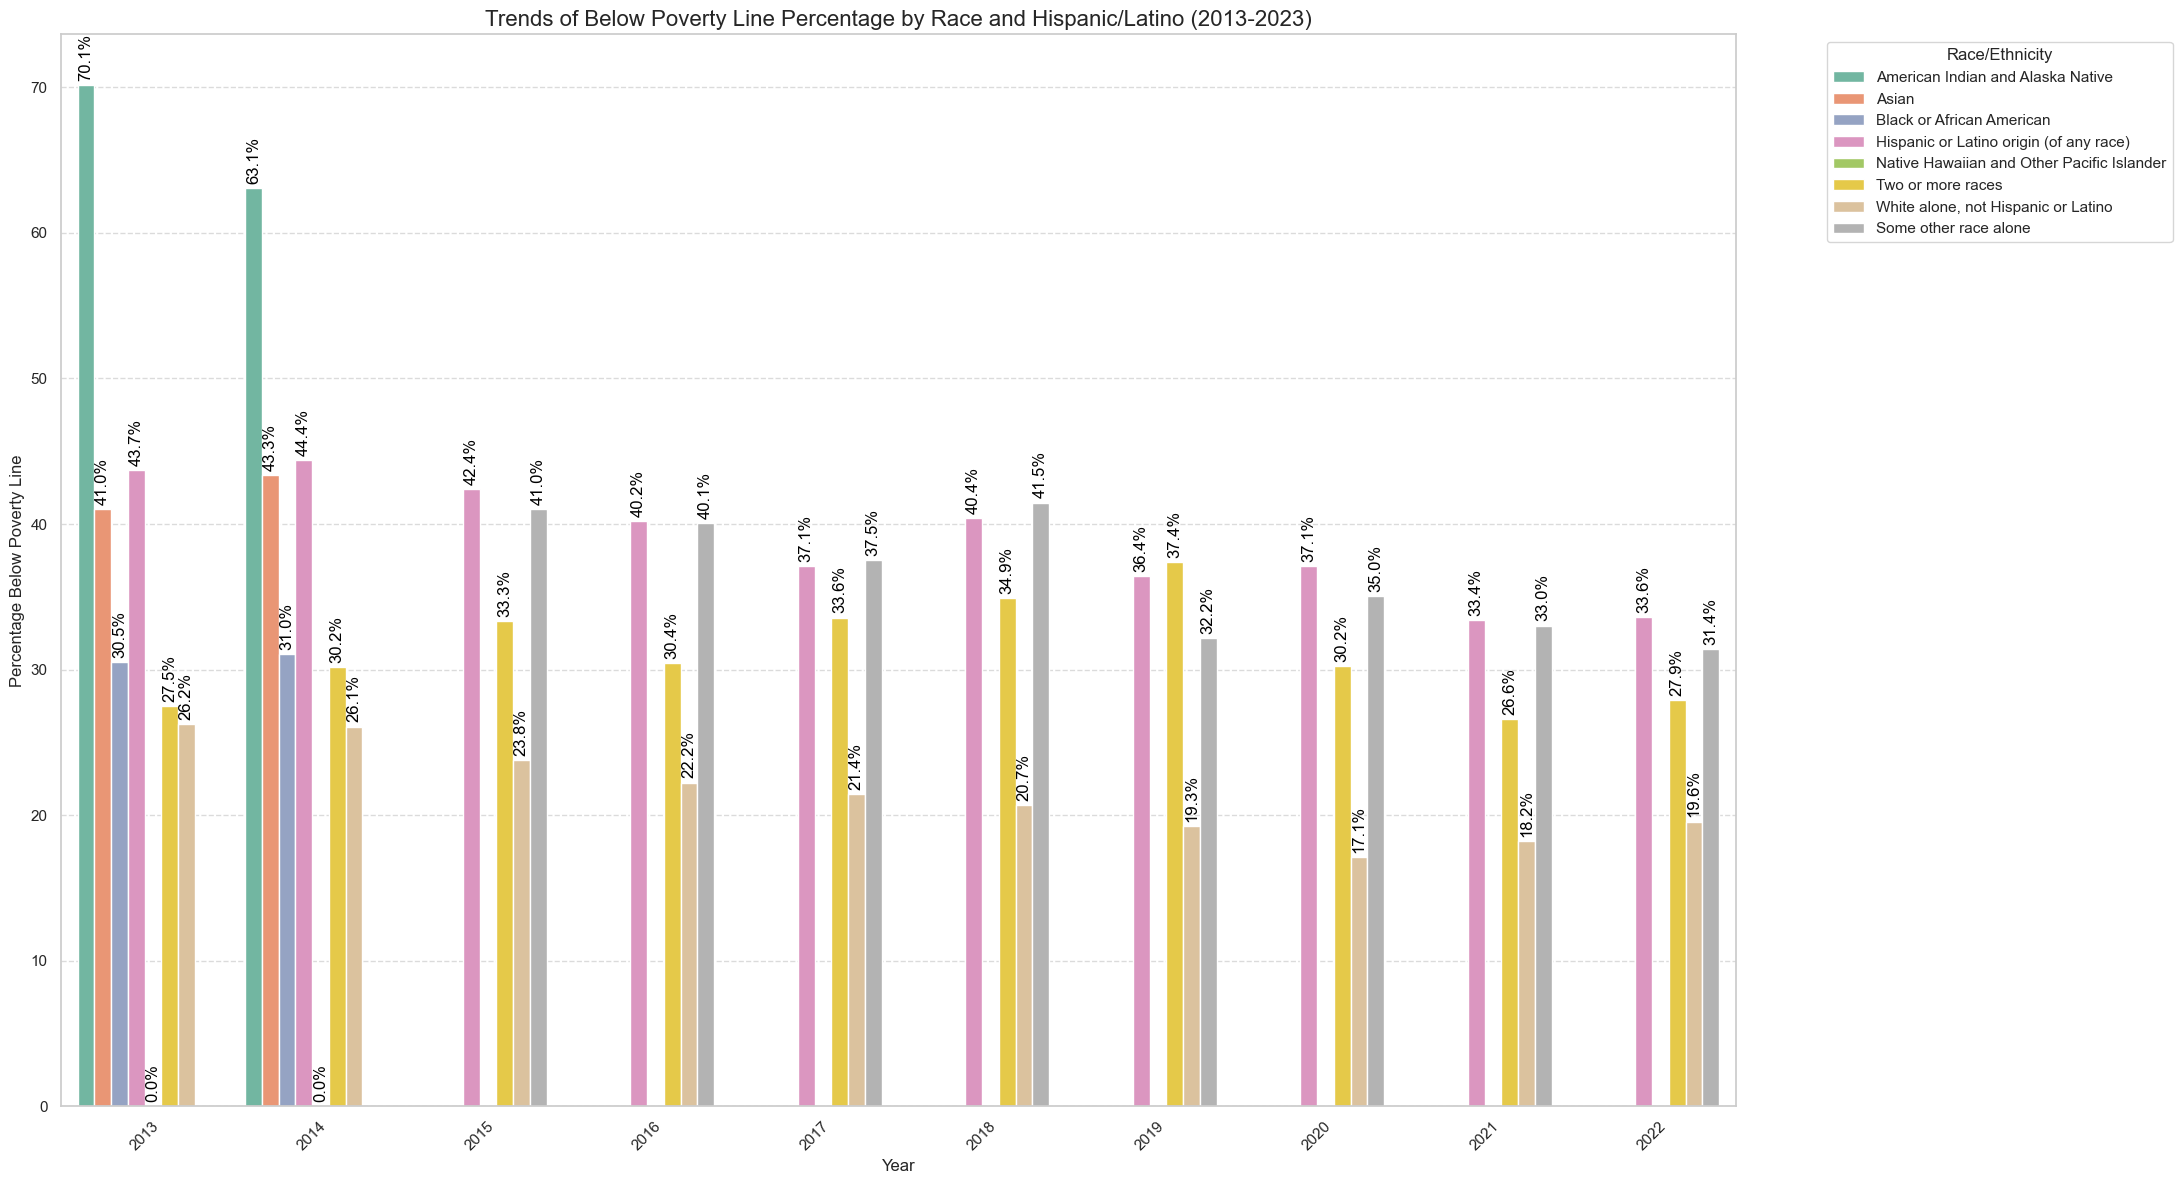

In [429]:
# Define race categories and filter the DataFrame
race_categories = [
    'White alone, not Hispanic or Latino',
    'Black or African American',
    'Asian',
    'Hispanic or Latino origin (of any race)',
    'American Indian and Alaska Native',
    'Native Hawaiian and Other Pacific Islander',
    'Some other race alone',
    'Two or more races'
]

race_df = combined_df[combined_df['label'].isin(race_categories)]      

race_df['below_poverty_estimate'] = (race_df['below_poverty_estimate'])
race_df['total_estimate'] = (race_df['total_estimate'])
race_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Calculate percentage below poverty line
race_df['percent_below_poverty'] = (race_df['below_poverty_estimate'] / race_df['total_estimate']) * 100

# Group and pivot data for plots
race_trend = race_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()
pivot_df = race_trend.pivot(index='year', columns='label', values='percent_below_poverty')


# Bar plot with percentage annotations
plt.figure(figsize=(22, 12))
sns.barplot(data=race_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="Set2")
plt.title("Trends of Below Poverty Line Percentage by Race and Hispanic/Latino (2013-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Below Poverty Line", fontsize=12)
plt.xticks(rotation=45)

# Annotate each bar with percentage value
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=12, color='black', rotation=90)

plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Poverty trends based on education

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/3207910852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['below_poverty_estimate'] = (education_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/3207910852.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['total_estimate'] = (education_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/3207910852.py:17: SettingWithCopyWarning:

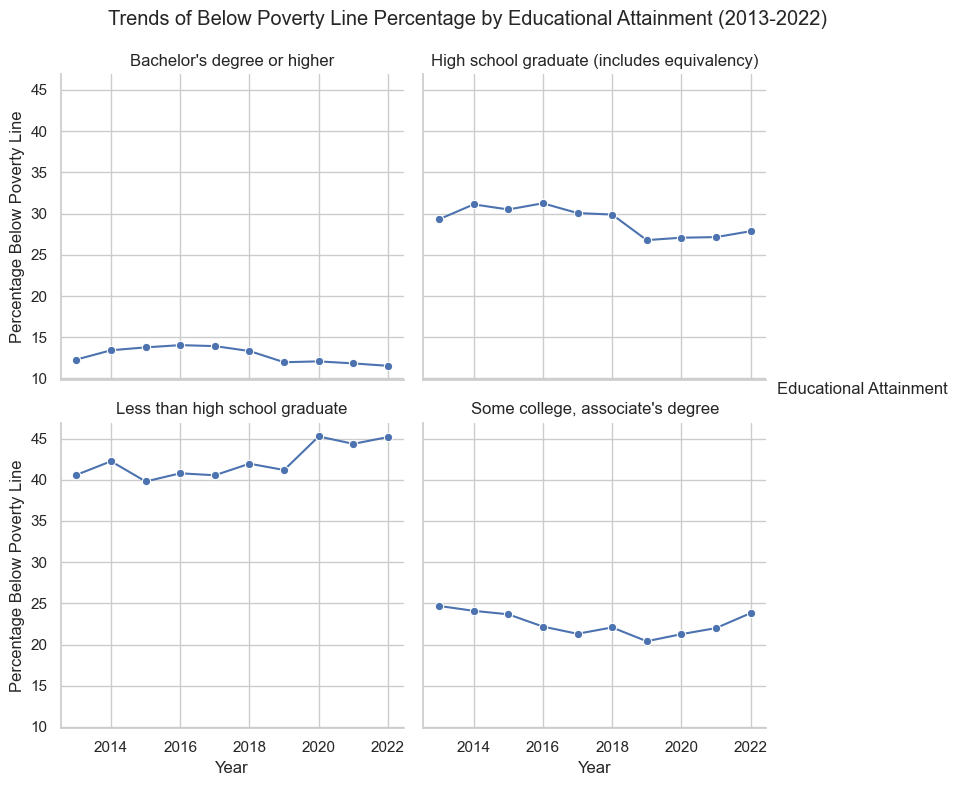

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_25683/3207910852.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")


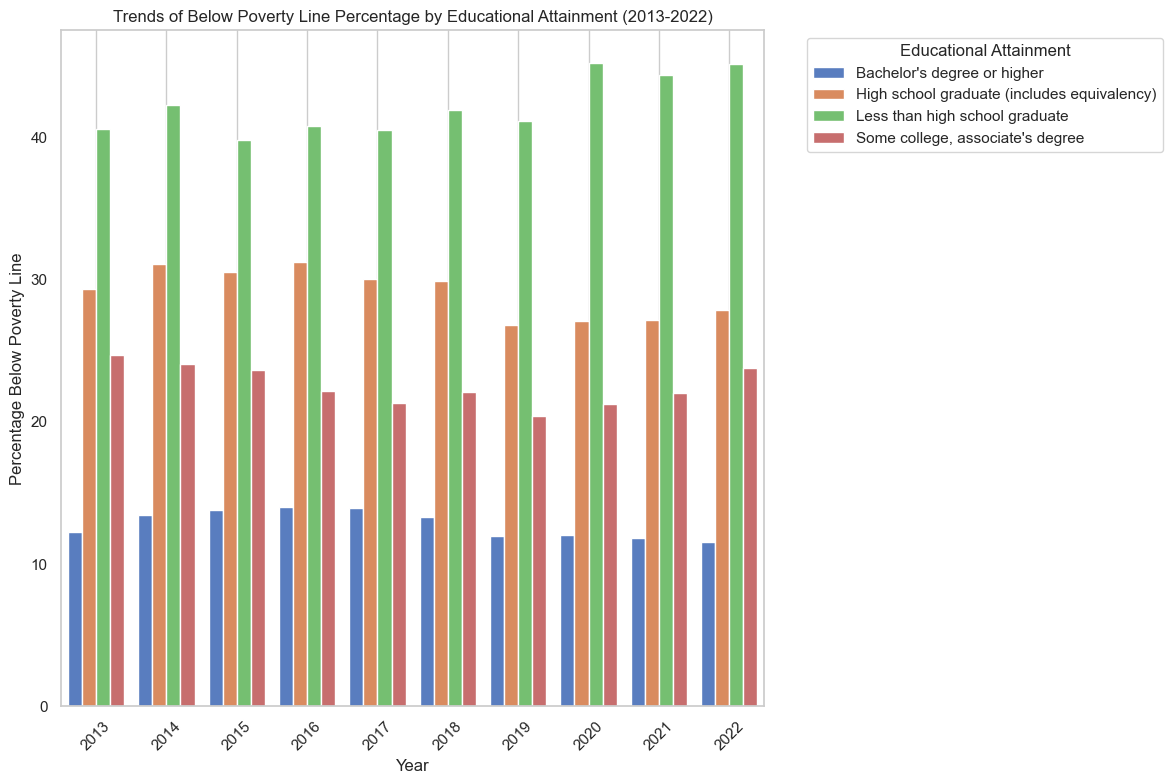

In [436]:
# education 
education_categories = [
    "Less than high school graduate",
    "High school graduate (includes equivalency)",
    "Some college, associate's degree",
    "Bachelor's degree or higher",
]

# Filter combined_df for these categories
education_df = combined_df[combined_df['label'].isin(education_categories)]


education_df['below_poverty_estimate'] = (education_df['below_poverty_estimate'])
education_df['total_estimate'] = (education_df['total_estimate'])

# Drop rows with NaN values in either column after conversion
education_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Step 3: Calculate Percentages
education_df['percent_below_poverty'] = (education_df['below_poverty_estimate'] / education_df['total_estimate']) * 100

# Group by year and educational attainment category
education_trend = education_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()


# line graph plots
g = sns.FacetGrid(education_trend, col='label', col_wrap=2, height=4, sharey=True)

# Map the line plot to the grid
g.map_dataframe(sns.lineplot, x='year', y='percent_below_poverty', marker='o')

# Add titles and labels
g.set_axis_labels("Year", "Percentage Below Poverty Line")
g.set_titles(col_template="{col_name}")
g.add_legend(title='Educational Attainment')

# Add overall title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2022)")

# Show the plot
plt.show()


#bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")

# Add labels and title
plt.title("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Line")
plt.legend(title='Educational Attainment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Poverty trends based on employment

    Year Employment Status  Below Poverty Estimate  \
0   2013          Employed                  7044.0   
1   2013        Unemployed                  3799.0   
2   2014          Employed                  7259.0   
3   2014        Unemployed                  3854.0   
4   2015          Employed                  6909.0   
5   2015        Unemployed                  3116.0   
6   2016          Employed                  6832.0   
7   2016        Unemployed                  3240.0   
8   2017          Employed                  7186.0   
9   2017        Unemployed                  2609.0   
10  2018          Employed                  7246.0   
11  2018        Unemployed                  2687.0   
12  2019          Employed                  6727.0   
13  2019        Unemployed                  2455.0   
14  2020          Employed                  7787.0   
15  2020        Unemployed                  2724.0   
16  2021          Employed                  7202.0   
17  2021        Unemployed  

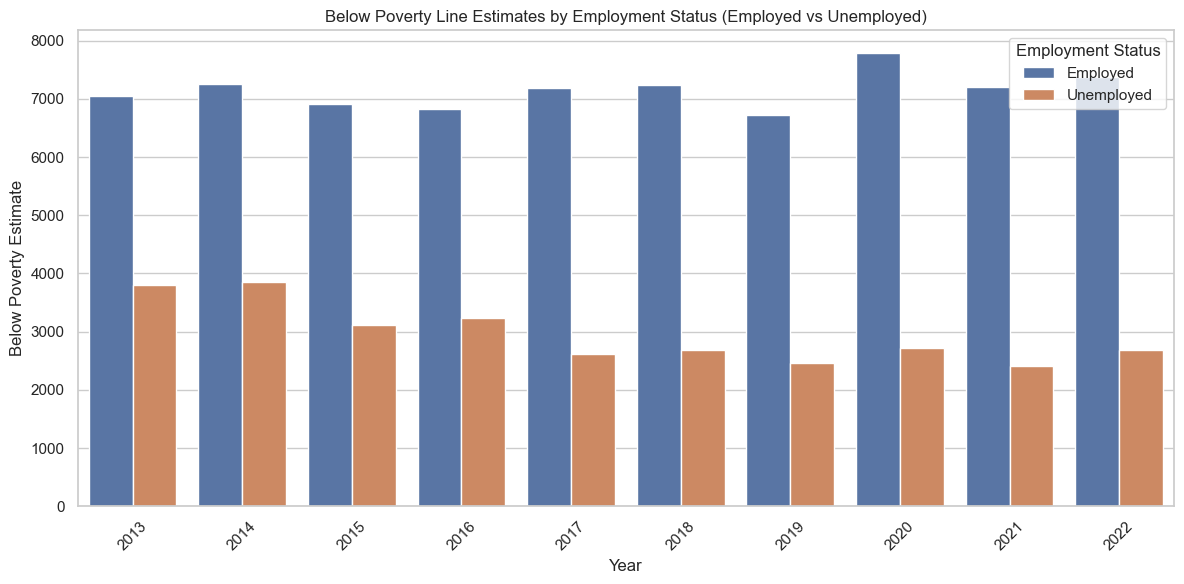

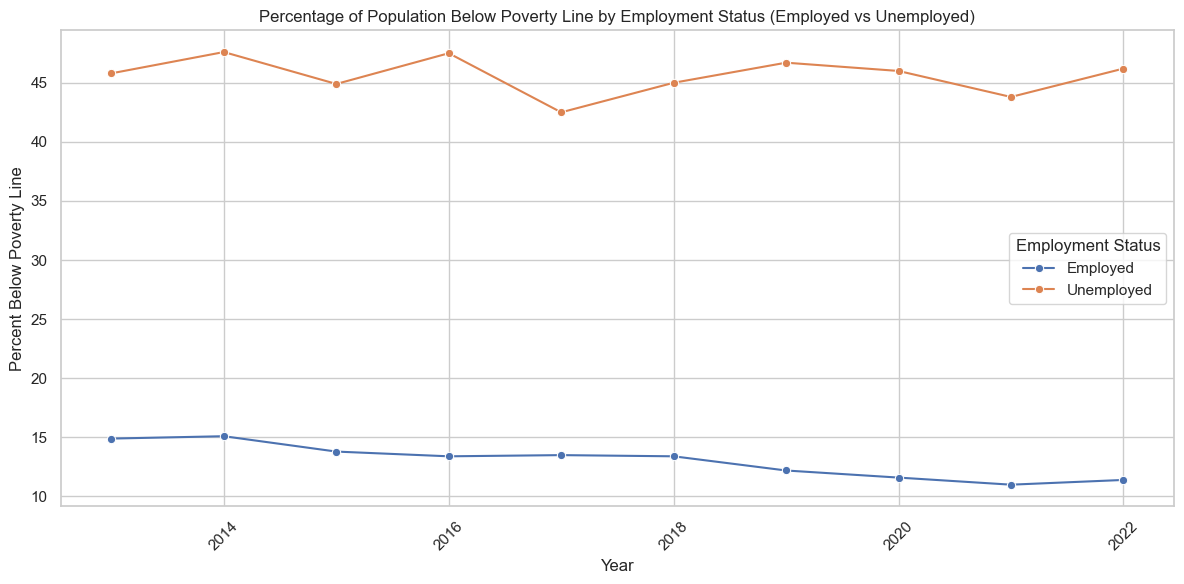

In [447]:
# Filter for employed and unemployed categories
employment_data = combined_df[
    combined_df['label'].isin(['Employed', 'Unemployed'])
]

# Create a list to hold rows for the summary DataFrame
employment_summary_rows = []

# Loop through unique years in the filtered employment data
for year in employment_data['year'].unique():
    yearly_data = employment_data[employment_data['year'] == year]

    # Extract data for Employed
    employed_row = yearly_data[yearly_data['label'] == 'Employed']
    if not employed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Employed',
            'Below Poverty Estimate': employed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': employed_row['percent_below_poverty_estimate'].values[0]
        })

    # Extract data for Unemployed
    unemployed_row = yearly_data[yearly_data['label'] == 'Unemployed']
    if not unemployed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Unemployed',
            'Below Poverty Estimate': unemployed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': unemployed_row['percent_below_poverty_estimate'].values[0]
        })

# Create a DataFrame from the list of rows
employment_summary = pd.DataFrame(employment_summary_rows)

# Display the employment summary
print(employment_summary)

employment_summary['Below Poverty Estimate'] = employment_summary['Below Poverty Estimate']

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=employment_summary, 
            x='Year', 
            y='Below Poverty Estimate', 
            hue='Employment Status')

# Customize the plot
plt.title('Below Poverty Line Estimates by Employment Status (Employed vs Unemployed)')
plt.xlabel('Year')
plt.ylabel('Below Poverty Estimate')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.tight_layout()

# Show the plot
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=employment_summary, 
             x='Year', 
             y='Percent Below Poverty Estimate', 
             hue='Employment Status', 
             marker='o')

# Customize the plot
plt.title('Percentage of Population Below Poverty Line by Employment Status (Employed vs Unemployed)')
plt.xlabel('Year')
plt.ylabel('Percent Below Poverty Line')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.tight_layout()

# Show the plot
plt.show()

# Poverty trends based on work experience

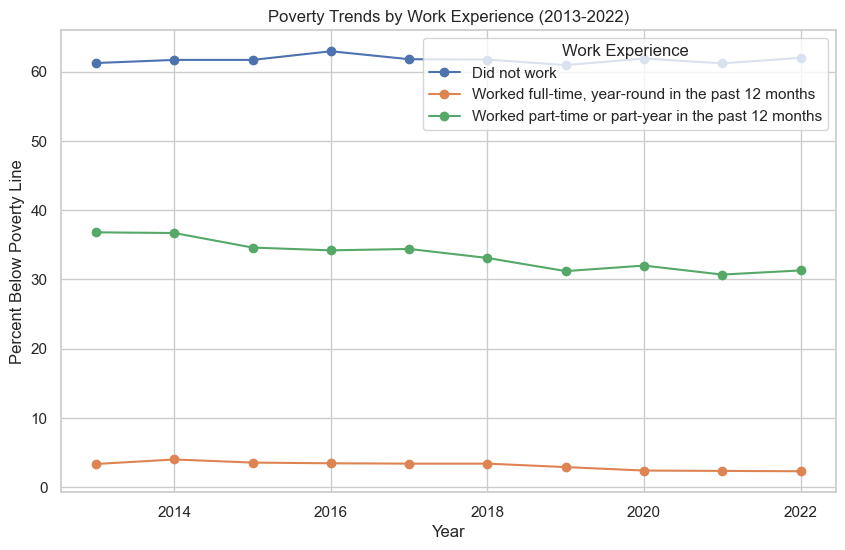

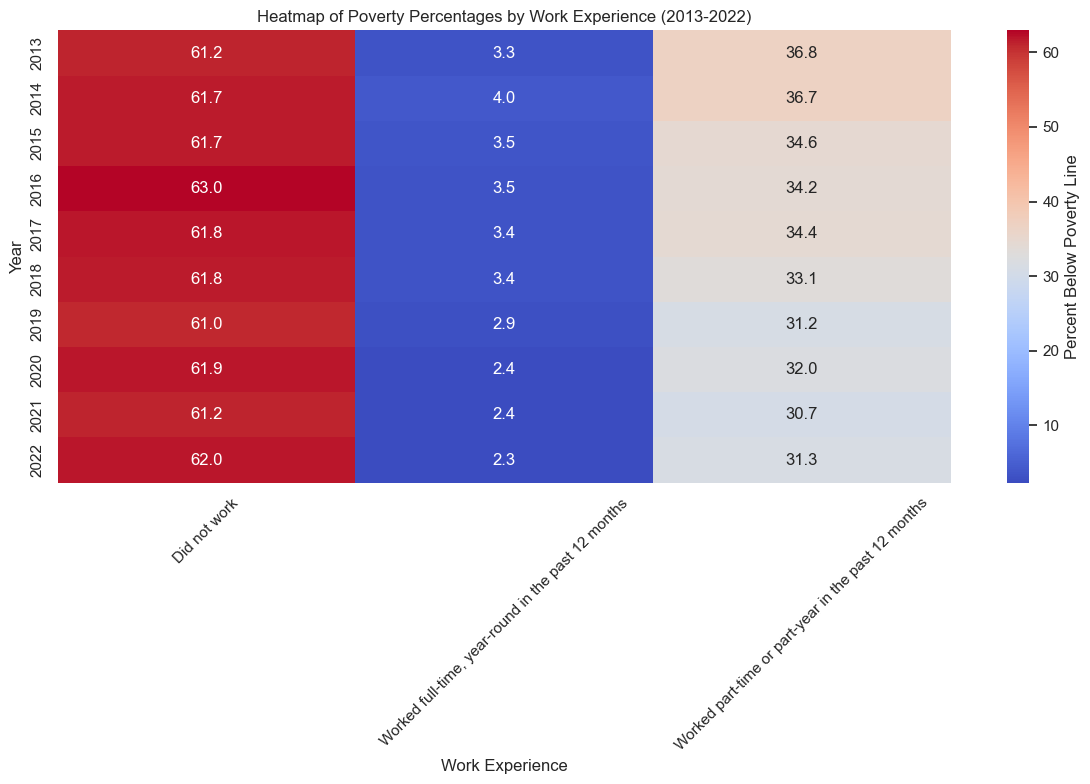

In [450]:
work_experience_categories = [
    "Worked full-time, year-round in the past 12 months",
    "Worked part-time or part-year in the past 12 months",
    "Did not work"
]
filtered_df = combined_df[combined_df['label'].isin(work_experience_categories)]

# pivot table for years and work experience categories
pivot_data = filtered_df.pivot_table(
    index='year',
    columns='label',
    values='percent_below_poverty_estimate'
)

# line chart for trends over years
plt.figure(figsize=(10, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Poverty Trends by Work Experience (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Percent Below Poverty Line')
plt.legend(title='Work Experience')
plt.grid(True)
plt.show()

# heatmap of poverty percentages
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Percent Below Poverty Line'})
plt.title('Heatmap of Poverty Percentages by Work Experience (2013-2022)')
plt.xlabel('Work Experience')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()